# Langmuir surface area calculations

Another common method of calculating specific surface area relies on fitting the isotherm with a Langmuir model. This model assumes adsorption is confined to a single layer. 
First, make sure the data is imported by running the previous notebook.

In [1]:
%run import.ipynb

Selected 0 samples
Selected 23 adsorbates
Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric heat calculation


We use the `area_langmuir` function, and we first want to see the range selected by the standard method. For this we pass the `verbose` parameter and then use matplotlib to display the graph.

MCM-41
Langmuir surface area: a = 1409 m²/g
Minimum pressure point chosen is 0.051 and maximum is 0.888
The slope of the Langmuir line: s = 69.221
The intercept of the Langmuir line: i = 25.424
The Langmuir constant is: K = 2
Amount for a monolayer: n = 0.01445 mol/g


c:\users\paul\git\pygaps\src\pygaps\calculations\area_langmuir.py:225: UserWarning: The correlation is not linear
  warnings.warn("The correlation is not linear")


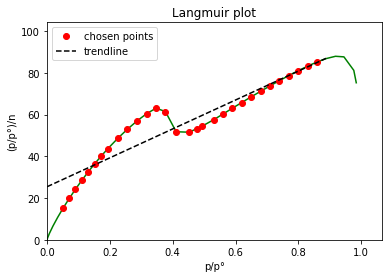

In [2]:
isotherm = next(i for i in isotherms_n2_77k if i.material_name=='MCM-41')
print(isotherm.material_name)
pygaps.area_langmuir(isotherm, verbose=True)
plt.show()

The correlation is not very good due to the mesopore condensation phenomenon. Due to this, the area calculated is not realistic. We can select the range manually for a better fit.

MCM-41
Langmuir surface area: a = 528 m²/g
Minimum pressure point chosen is 0.051 and maximum is 0.286
The slope of the Langmuir line: s = 184.623
The intercept of the Langmuir line: i = 7.389
The Langmuir constant is: K = 24
Amount for a monolayer: n = 0.00542 mol/g


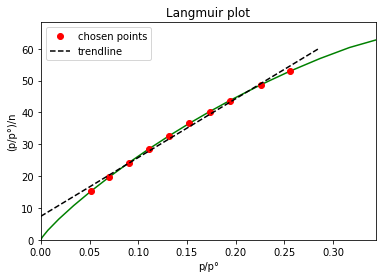

In [3]:
print(isotherm.material_name)
pygaps.area_langmuir(isotherm, limits=(0.05, 0.3), verbose=True)
plt.show()

The fit is now better and the calculated area is also realistic. Comparing it to the BET area obtained previously, we see that it is higher by about 150 m2. Since adsoprtion is happening in multiple layers rather than a monolayer, it is likely that the value for complete coverage overshoots the actual value. In general the Langmuir surface area is not as widely applicable as the BET one.

Now let's do the analysis on all of the nitrogen samples and compare the obtained surface areas with the BET ones.

c:\users\paul\git\pygaps\src\pygaps\calculations\area_langmuir.py:225: UserWarning: The correlation is not linear
  warnings.warn("The correlation is not linear")


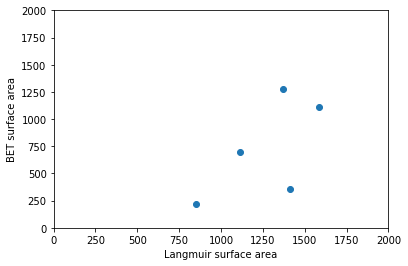

In [4]:
area_langmuir = []
area_bet = []
for isotherm in isotherms_n2_77k:
    area_bet.append(pygaps.area_BET(isotherm)['area'])
    area_langmuir.append(pygaps.area_langmuir(isotherm)['area'])
    
plt.scatter(area_langmuir, area_bet)
plt.xlim(xmin=0, xmax=2000)
plt.ylim(ymin=0, ymax=2000)

plt.xlabel('Langmuir surface area')
plt.ylabel('BET surface area')

plt.show()

We can see that some areas correspond, while others are not as well correlated. Unless the adsorption isotherm respects the Langmuir model, the calculated surface area is not correct. 

Now we'll do a t-plot in the [next notebook](tplot.ipynb).